### Target:
    
    - Increase learning Capacity.

### Results:

    - Model has 7950 parameters.

    - Train Accuracy = 98.98

    - Test Accuracy = 99.23

### Analysis:

    - To increase learning capacity we increased parameters, added non linearity in transition layer and reduced dropout to 0.2

    - Model is still not overfitting.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model7 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model7                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 8, 28, 28]           --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 6, 28, 28]           54                          0.68%
│    └─Dropout: 2-2                      [64, 6, 28, 28]           [64, 6, 28, 28]           --                             --
│    └─ReLU: 2-3                         [64, 6, 28, 28]           [64, 6, 28, 28]           --                             --
│    └─BatchNorm2d: 2-4                  [64, 6, 28, 28]           [64, 6, 28, 28]           12                          0.15%
│    └─Conv2d: 2-5                       [64, 6, 28, 28]           [64, 8, 28, 28]           432               

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


Train: Batch Loss=0.0975 Batch_id=937 Average Loss=0.4689 Accuracy=86.56: 100%|██████████| 938/938 [00:39<00:00, 23.50it/s]


Test set: Average loss: 0.1072, Accuracy: 9711/10000 (97.11%)

Epoch 2


Train: Batch Loss=0.0649 Batch_id=937 Average Loss=0.1109 Accuracy=96.84: 100%|██████████| 938/938 [00:40<00:00, 23.45it/s]


Test set: Average loss: 0.0606, Accuracy: 9825/10000 (98.25%)

Epoch 3


Train: Batch Loss=0.2500 Batch_id=937 Average Loss=0.0774 Accuracy=97.78: 100%|██████████| 938/938 [00:41<00:00, 22.55it/s]


Test set: Average loss: 0.0470, Accuracy: 9870/10000 (98.70%)

Epoch 4


Train: Batch Loss=0.1740 Batch_id=937 Average Loss=0.0658 Accuracy=98.05: 100%|██████████| 938/938 [00:42<00:00, 22.22it/s]


Test set: Average loss: 0.0471, Accuracy: 9860/10000 (98.60%)

Epoch 5


Train: Batch Loss=0.0079 Batch_id=937 Average Loss=0.0583 Accuracy=98.25: 100%|██████████| 938/938 [00:42<00:00, 22.13it/s]


Test set: Average loss: 0.0474, Accuracy: 9856/10000 (98.56%)

Epoch 6


Train: Batch Loss=0.1042 Batch_id=937 Average Loss=0.0521 Accuracy=98.47: 100%|██████████| 938/938 [00:43<00:00, 21.38it/s]


Test set: Average loss: 0.0415, Accuracy: 9868/10000 (98.68%)

Epoch 7


Train: Batch Loss=0.1754 Batch_id=937 Average Loss=0.0466 Accuracy=98.63: 100%|██████████| 938/938 [00:44<00:00, 20.92it/s]


Test set: Average loss: 0.0360, Accuracy: 9894/10000 (98.94%)

Epoch 8


Train: Batch Loss=0.0109 Batch_id=937 Average Loss=0.0438 Accuracy=98.67: 100%|██████████| 938/938 [00:48<00:00, 19.23it/s]


Test set: Average loss: 0.0364, Accuracy: 9895/10000 (98.95%)

Epoch 9


Train: Batch Loss=0.0142 Batch_id=937 Average Loss=0.0415 Accuracy=98.76: 100%|██████████| 938/938 [02:36<00:00,  5.99it/s]


Test set: Average loss: 0.0311, Accuracy: 9900/10000 (99.00%)

Epoch 10


Train: Batch Loss=0.0847 Batch_id=937 Average Loss=0.0400 Accuracy=98.79: 100%|██████████| 938/938 [00:43<00:00, 21.47it/s]


Test set: Average loss: 0.0307, Accuracy: 9909/10000 (99.09%)

Epoch 11


Train: Batch Loss=0.0365 Batch_id=937 Average Loss=0.0372 Accuracy=98.86: 100%|██████████| 938/938 [00:43<00:00, 21.46it/s]


Test set: Average loss: 0.0336, Accuracy: 9904/10000 (99.04%)

Epoch 12


Train: Batch Loss=0.1964 Batch_id=937 Average Loss=0.0343 Accuracy=98.98: 100%|██████████| 938/938 [00:42<00:00, 21.95it/s]


Test set: Average loss: 0.0285, Accuracy: 9911/10000 (99.11%)

Epoch 13


Train: Batch Loss=0.0179 Batch_id=937 Average Loss=0.0341 Accuracy=98.94: 100%|██████████| 938/938 [00:40<00:00, 23.25it/s]


Test set: Average loss: 0.0260, Accuracy: 9923/10000 (99.23%)

Epoch 14


Train: Batch Loss=0.1486 Batch_id=937 Average Loss=0.0343 Accuracy=98.96: 100%|██████████| 938/938 [00:40<00:00, 23.29it/s]


Test set: Average loss: 0.0284, Accuracy: 9915/10000 (99.15%)

Epoch 15


Train: Batch Loss=0.0027 Batch_id=937 Average Loss=0.0330 Accuracy=98.98: 100%|██████████| 938/938 [00:39<00:00, 23.98it/s]


Test set: Average loss: 0.0338, Accuracy: 9898/10000 (98.98%)



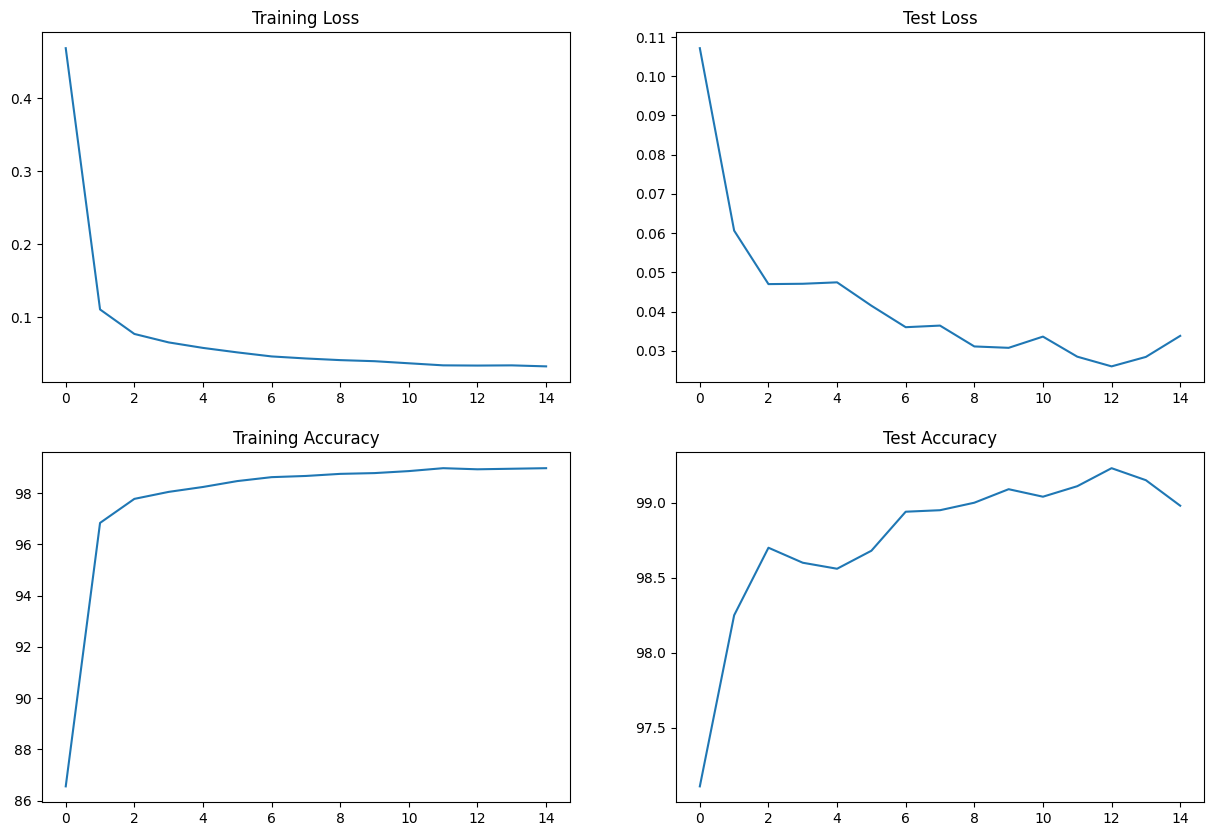

In [12]:
from utils import plot_stats
plot_stats()

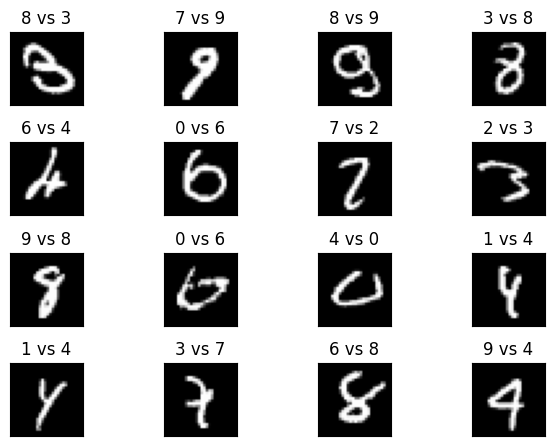

In [13]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual